# My Logistic Regression Prediction Notebook

## Summary

In this notebook, I explored the logistic (sigmoid) function and built logistic regression models using both PyTorch’s `nn.Sequential` and a custom `nn.Module` class. I visualized the sigmoid function, made predictions with both 1D and 2D inputs, and plotted the results to interpret how logistic regression transforms inputs into probabilities.

---

## Overview

1. **Logistic Function Visualization:**  
   I generated a range of values from -100 to 100 and applied the sigmoid function using both `nn.Sigmoid()` and `torch.sigmoid()`. I plotted the sigmoid curve to see how it maps any real number to a value between 0 and 1.

2. **Building Logistic Regression Models:**  
   - With `nn.Sequential`, I created models for both 1D and 2D inputs, printed out the model parameters, and made predictions for sample inputs.
   - With a custom class, I defined a `logistic_regression` class inheriting from `nn.Module`, made predictions for both 1D and 2D inputs, and printed the results.

3. **Visualizing Model Predictions:**  
   - For the 1D custom model, I plotted the model’s sigmoid output over a wide range of inputs and overlaid the model’s predictions for specific test points as red dots.
   - For the 2D sequential model, I visualized the model’s output as a heatmap, showing how predicted probabilities change across a grid of two input features.

---

## Interpretation

- **Sigmoid Function:**  
  The sigmoid curve shows how logistic regression squashes any input into a probability between 0 and 1. Inputs far from zero are mapped close to 0 or 1, while values near zero are mapped near 0.5.

- **Model Predictions:**  
  The logistic regression models (both sequential and custom) learn a linear combination of inputs and pass it through the sigmoid, producing probabilities. The plots show how the model responds to different inputs:
    - For 1D, the output is a smooth S-shaped curve.
    - For 2D, the heatmap reveals how the model’s decision boundary might look in higher dimensions.

- **Overlayed Points:**  
  By plotting specific predictions on the sigmoid curve, I can see exactly where my test inputs fall in terms of predicted probability.

---

## What I Learned

- How to implement and visualize the sigmoid function in PyTorch.
- How to build logistic regression models using both built-in and custom approaches.
- How to interpret model predictions visually for both 1D and 2D cases.
- The importance of visualization for understanding model behavior and decision boundaries.

---

**This notebook gave me hands-on experience with the core ideas behind logistic regression and how to interpret its outputs using PyTorch and Matplotlib.**

In [1]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt 


torch.manual_seed(2)

# Logistic Function

The tensor:  tensor([[-100.0000],
        [ -99.9000],
        [ -99.8000],
        ...,
        [  99.7000],
        [  99.8000],
        [  99.9000]])


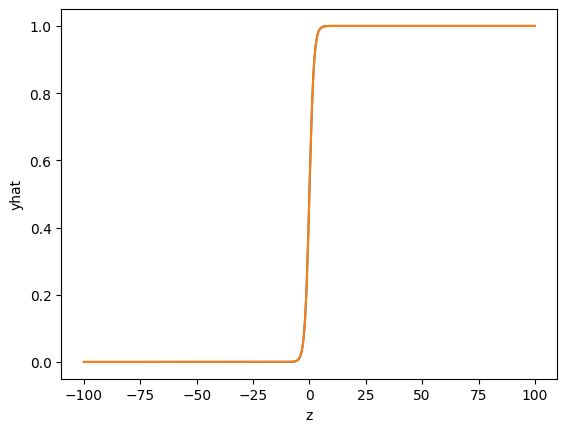

In [2]:
z = torch.arange(-100, 100, 0.1).view(-1, 1)  # Create a column tensor with values from -100 to 100 in steps of 0.1
print("The tensor: ", z)  # Print the tensor to see its values

sig = nn.Sigmoid()  # Instantiate the Sigmoid activation function as a module

yhat = sig(z)  # Apply the sigmoid function to each value in z

plt.plot(z.numpy(), yhat.numpy())  # Plot z vs. yhat (sigmoid output)
plt.xlabel('z')  # Label the x-axis as 'z'
plt.ylabel('yhat')  # Label the y-axis as 'yhat'

yhat = torch.sigmoid(z)  # Alternatively, apply the sigmoid function directly using torch.sigmoid
plt.plot(z.numpy(), yhat.numpy())  # Plot the result again for comparison

# Building a Logistic Regression Model using nn.Sequential

In [3]:
x = torch.tensor([[1.0]])  # Create a 1D input tensor with a single value
X = torch.tensor([[1.0], [100]])  # Create a 2D input tensor with two samples
print('x = ', x)  # Print the single input tensor
print('X = ', X)  # Print the multi-sample input tensor

model = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())  # Build a sequential model: linear layer (1 input), then sigmoid

print("list(model.parameters()):\n ", list(model.parameters()))  # Show model parameters (weights and bias)
print("\nmodel.state_dict():\n ", model.state_dict())  # Show parameter values in a state dictionary

yhat = model(x)  # Make a prediction for the single input
print("The prediction: ", yhat)  # Print the prediction

yhat = model(X)  # Make predictions for both samples in X
yhat  # Display the predictions

x = torch.tensor([[1.0, 1.0]])  # Create a 2D input tensor with two features (single sample)
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])  # Create a 2D input tensor with three samples, two features each
print('x = ', x)  # Print the single 2-feature input
print('X = ', X)  # Print the multi-sample, 2-feature input

model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())  # Build a sequential model: linear layer (2 inputs), then sigmoid

print("list(model.parameters()):\n ", list(model.parameters()))  # Show model parameters (weights and bias)
print("\nmodel.state_dict():\n ", model.state_dict())  # Show parameter values in a state dictionary

yhat = model(x)  # Make a prediction for the single 2-feature input
print("The prediction: ", yhat)  # Print the prediction

yhat = model(X)  # Make predictions for all three 2-feature samples
print("The prediction: ", yhat)  # Print the predictions

x =  tensor([[1.]])
X =  tensor([[  1.],
        [100.]])
list(model.parameters()):
  [Parameter containing:
tensor([[0.2294]], requires_grad=True), Parameter containing:
tensor([-0.2380], requires_grad=True)]

model.state_dict():
  OrderedDict([('0.weight', tensor([[0.2294]])), ('0.bias', tensor([-0.2380]))])
The prediction:  tensor([[0.4979]], grad_fn=<SigmoidBackward0>)
x =  tensor([[1., 1.]])
X =  tensor([[1., 1.],
        [1., 2.],
        [1., 3.]])
list(model.parameters()):
  [Parameter containing:
tensor([[ 0.1939, -0.0361]], requires_grad=True), Parameter containing:
tensor([0.3021], requires_grad=True)]

model.state_dict():
  OrderedDict([('0.weight', tensor([[ 0.1939, -0.0361]])), ('0.bias', tensor([0.3021]))])
The prediction:  tensor([[0.6130]], grad_fn=<SigmoidBackward0>)
The prediction:  tensor([[0.6130],
        [0.6044],
        [0.5957]], grad_fn=<SigmoidBackward0>)


# Building Custom Modules

In [4]:
class logistic_regression(nn.Module):  # Define a custom logistic regression class inheriting from nn.Module
    
    # Constructor
    def __init__(self, n_inputs):  # n_inputs: number of input features
        super(logistic_regression, self).__init__()  # Call the parent class constructor
        self.linear = nn.Linear(n_inputs, 1)  # Define a linear layer (n_inputs -> 1 output)
    
    # Prediction (forward pass)
    def forward(self, x):  # x: input tensor
        yhat = torch.sigmoid(self.linear(x))  # Apply linear transformation, then sigmoid activation
        return yhat  # Return the predicted probability

# Create x and X tensor

x = torch.tensor([[1.0]])  # Single input sample with one feature
X = torch.tensor([[-100.0], [0.0], [100.0]])  # Multiple samples for prediction
print('x = ', x)  # Print single input
print('X = ', X)  # Print multiple inputs

# Create logistic regression model

model = logistic_regression(1)  # Instantiate the model for 1 input feature

# Print parameters 

print("list(model.parameters()):\n ", list(model.parameters()))  # Show model parameters (weights and bias)
print("\nmodel.state_dict():\n ", model.state_dict())  # Show parameter values in a state dictionary

# Make the prediction of x

yhat = model(x)  # Predict for single input
print("The prediction result: \n", yhat)  # Print prediction

# Make the prediction of X

yhat = model(X)  # Predict for multiple inputs
print("The prediction result: \n", yhat)  # Print predictions

# Create logistic regression model

model = logistic_regression(2)  # Instantiate the model for 2 input features

# Create x and X tensor

x = torch.tensor([[1.0, 2.0]])  # Single input sample with two features
X = torch.tensor([[100.0, -100.0], [0.0, 0.0], [-100.0, 100.0]])  # Multiple samples for prediction
print('x = ', x)  # Print single 2-feature input
print('X = ', X)  # Print multiple 2-feature inputs

# Make the prediction of x

yhat = model(x)  # Predict for single 2-feature input
print("The prediction result: \n", yhat)  # Print prediction

# Make the prediction of X

yhat = model(X)  # Predict for multiple 2-feature inputs
print("The prediction result: \n", yhat)  # Print predictions

x =  tensor([[1.]])
X =  tensor([[-100.],
        [   0.],
        [ 100.]])
list(model.parameters()):
  [Parameter containing:
tensor([[0.2381]], requires_grad=True), Parameter containing:
tensor([-0.1149], requires_grad=True)]

model.state_dict():
  OrderedDict([('linear.weight', tensor([[0.2381]])), ('linear.bias', tensor([-0.1149]))])
The prediction result: 
 tensor([[0.5307]], grad_fn=<SigmoidBackward0>)
The prediction result: 
 tensor([[4.0805e-11],
        [4.7130e-01],
        [1.0000e+00]], grad_fn=<SigmoidBackward0>)
x =  tensor([[1., 2.]])
X =  tensor([[ 100., -100.],
        [   0.,    0.],
        [-100.,  100.]])
The prediction result: 
 tensor([[0.2943]], grad_fn=<SigmoidBackward0>)
The prediction result: 
 tensor([[7.7529e-33],
        [3.4841e-01],
        [1.0000e+00]], grad_fn=<SigmoidBackward0>)


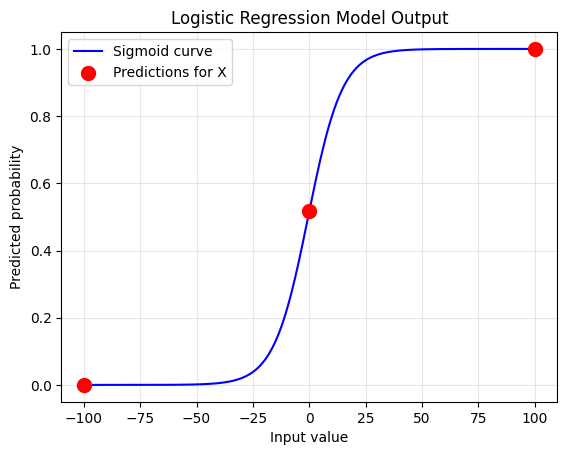

In [6]:
# Create a new model with 1 input feature to match our X data
model_1d = logistic_regression(1)  # Model for single input feature

# First plot the full sigmoid curve
z_full = torch.arange(-100, 100, 0.1).view(-1, 1)
yhat_full = model_1d(z_full)
plt.plot(z_full.numpy(), yhat_full.detach().numpy(), 'b-', label="Sigmoid curve")

# Overlay the predictions for your specific X values
X = torch.tensor([[-100.0], [0.0], [100.0]])
yhat_X = model_1d(X).detach().numpy()
plt.scatter(X.numpy(), yhat_X, color='red', s=100, label="Predictions for X", zorder=5)

plt.xlabel("Input value")
plt.ylabel("Predicted probability")
plt.title("Logistic Regression Model Output")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

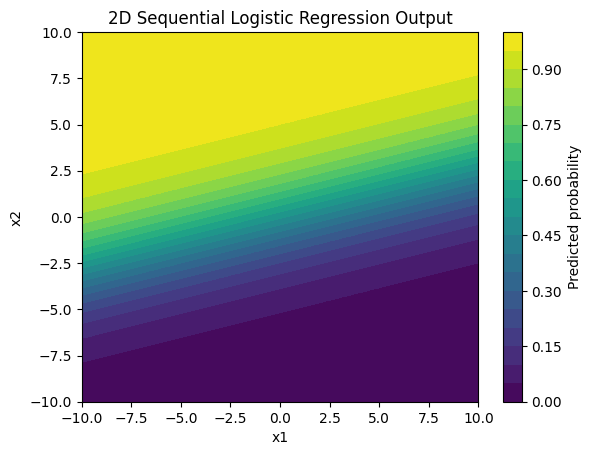

In [7]:
# 2D Sequential Model Visualization (heatmap)
import numpy as np
model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
xx1, xx2 = np.meshgrid(x1, x2)
inputs = torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float32)
yhat = model(inputs).detach().numpy().reshape(xx1.shape)
plt.contourf(xx1, xx2, yhat, levels=20, cmap='viridis')
plt.colorbar(label='Predicted probability')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Sequential Logistic Regression Output')
plt.show()

Model parameters before prediction:
Parameter containing:
tensor([[0.4147]], requires_grad=True)
Parameter containing:
tensor([0.4232], requires_grad=True)
Prediction for X = -10.0: 0.023577790707349777


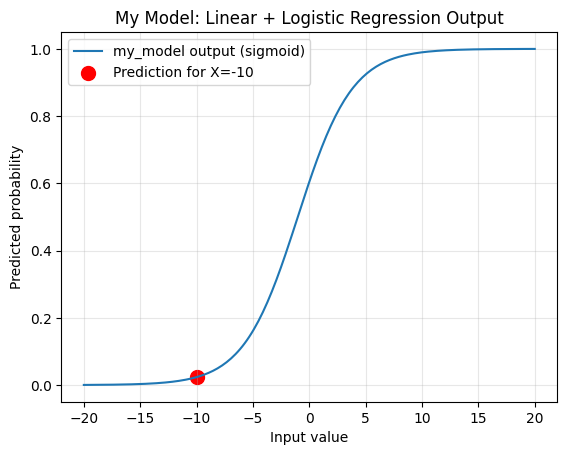

In [8]:
X = torch.tensor([[-10.0]])  # Define input tensor as a 2D tensor (shape [1, 1])

# Create a model: linear regression followed by logistic regression (sigmoid)
my_model = nn.Sequential(
    nn.Linear(1, 1),   # Linear regression layer (1 input feature, 1 output)
    nn.Sigmoid()       # Logistic regression (sigmoid activation)
)

# Print model parameters before prediction
print("Model parameters before prediction:")  # Print a header
for param in my_model.parameters():  # Loop through model parameters
    print(param)  # Print each parameter (weights and bias)

# Make a prediction
yhat = my_model(X)  # Pass input X through the model to get prediction
print("Prediction for X = -10.0:", yhat.item())  # Print the prediction result

# Visualize the model's sigmoid output over a range of inputs
z = torch.linspace(-20, 20, 200).view(-1, 1)  # Create a range of input values for plotting
yhat_curve = my_model(z).detach().numpy()  # Get model predictions for the range (detach to convert to numpy)
plt.plot(z.numpy(), yhat_curve, label="my_model output (sigmoid)")  # Plot the model's sigmoid curve

plt.scatter(X.numpy(), yhat.detach().numpy(), color='red', s=100, label="Prediction for X=-10")  # Plot the prediction as a red dot

plt.xlabel("Input value")  # Label x-axis
plt.ylabel("Predicted probability")  # Label y-axis
plt.title("My Model: Linear + Logistic Regression Output")  # Set plot title
plt.legend()  # Show legend
plt.grid(True, alpha=0.3)  # Add grid for readability
plt.show()  # Display the plot